___
# Ciência dos Dados - PROJETO 1

## Guilherme Guidi 2A
___

## O CRESCIMENTO DA UTILIZAÇÃO DOS MEIOS DE COMUNICAÇÃO EM RELAÇÃO AO PERFIL ECONÔMICO DA POPULAÇÃO

___
## Introdução

A partir de dados de 2013, 2014 e 2015, irei analisar a variação da utilização de meios de comunicação digitais em relação ao perfil econômico de cada pessoa. A análise irá abranger a renda do usuário, se este acessa a internet e qual o aparelho que o mesmo utiliza para acessar a internet.

Após a análise, obterei o aparelho mais utilizado para cada faixa de renda. Cada faixa será definida a partir do todo, ou seja, após obter a média de renda dos entrevistados, haverão pessoas abaixo de 33,33% da média, entre 33,33% e 66,66% e entre 66,66% e 99,99%.

No final da análise descobrirei o crescimento de determinado aparelho dentro de cada faixa e qual o mais utilizado no passar dos anos por todas as faixas.


___
## Análise e Resultados

In [1]:
import time
import pandas as pd
import numpy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import os
matplotlib.style.use('ggplot')

In [2]:

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/Gui Guidi/Desktop/Engenharia Comp/2º Semestre/Ciencia-Dados/Aula Panda Inicial 01/Projeto1


In [3]:
#Lendo arquivos
dados = pd.read_csv('DOM2015.csv')
dados1 = pd.read_csv('DOM2014.csv')
dados2 = pd.read_csv('DOM2013.csv')

In [4]:
## Tentei retirar os dados inválidos, mas o cmd apagava os NÃOs de algumas colunas



#retirando dados inválidos
#Dados15 = dados[pd.notnull(dados.V0220)&pd.notnull(dados.V0231)&pd.notnull(dados.V02322)&pd.notnull(dados.V02323)&pd.notnull(dados.V02324)&pd.notnull(dados.V02325)]


In [5]:
#Retirando dados inválidos
#Dados14 = dados1[pd.notnull(dados1.V0220)&pd.notnull(dados1.V0231)&pd.notnull(dados1.V02322)&pd.notnull(dados1.V02323)&pd.notnull(dados1.V02324)&pd.notnull(dados1.V02325)]

In [6]:
#Retirando dados inválidos
#Dados13 = dados2[pd.notnull(dados2.V0220)&pd.notnull(dados2.V0231)&pd.notnull(dados2.V02322)&pd.notnull(dados2.V02323)&pd.notnull(dados2.V02324)&pd.notnull(dados2.V02325)]

In [7]:
x = dados[['V0220','V0231','V02322','V02323','V02324','V02325','V4614']] 
x.to_csv("dados_Escolhidos_2015.csv")

In [8]:
#Selecionando colunas desejadas 
y = dados1[['V0220','V0231','V02322','V02323','V02324','V02325','V4614']] 
y.to_csv("dados_Escolhidos_2014.csv")

In [9]:
#Selecionando colunas desejadas
z = dados2[['V0220','V0231','V02322','V02323','V02324','V02325','V4614']]
z.to_csv("dados_Escolhidos_2013.csv")

In [10]:
#Transformando dados em Category para pode trabalhar como variável qualitativa
x.V0220 = x.V0220.astype('category')
x.V0231 = x.V0231.astype('category')
x.V02322 = x.V02322.astype('category')
x.V02323 = x.V02323.astype('category')
x.V02324 = x.V02324.astype('category')
x.V02325 = x.V02325.astype('category')

y.V0220 = y.V0220.astype('category')
y.V0231 = y.V0231.astype('category')
y.V02322 = y.V02322.astype('category')
y.V02323 = y.V02323.astype('category')
y.V02324 = y.V02324.astype('category')
y.V02325 = y.V02325.astype('category')

z.V0220 = z.V0220.astype('category')
z.V0231 = z.V0231.astype('category')
z.V02322 = z.V02322.astype('category')
z.V02323 = z.V02323.astype('category')
z.V02324 = z.V02324.astype('category')
z.V02325 = z.V02325.astype('category')



/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [11]:
#Renomeando os valores qualitativos para possibilitar a construção de gráficos CrossOver
x.V0220.cat.categories = ('Sim', 'Nao')
x.V0231.cat.categories = ('Sim', 'Nao')
x.V02322.cat.categories = ('Sim', 'Nao')
x.V02323.cat.categories = ('Sim', 'Nao')
x.V02324.cat.categories = ('Sim', 'Nao')
x.V02325.cat.categories = ('Sim', 'Nao')

y.V0220.cat.categories = ('Sim', 'Nao')
y.V0231.cat.categories = ('Sim', 'Nao')
y.V02322.cat.categories = ('Sim', 'Nao')
y.V02323.cat.categories = ('Sim', 'Nao')
y.V02324.cat.categories = ('Sim', 'Nao')
y.V02325.cat.categories = ('Sim', 'Nao')

z.V0220.cat.categories = ('Sim', 'Nao')
z.V0231.cat.categories = ('Sim', 'Nao')
z.V02322.cat.categories = ('Sim','Nao')
z.V02323.cat.categories = ('Sim', 'Nao')
z.V02324.cat.categories = ('Sim', 'Nao')
z.V02325.cat.categories = ('Sim', 'Nao')

In [12]:
#Retirando dados inválidos da Renda
x = x[x['V4614']!=999999999999.0]
y = y[y['V4614']!=999999999999.0]
z = z[z['V4614']!=999999999999.0]

In [13]:
#Quantidade de pessoas que utilizam a internet dentro deste PNAD2015
x.V02322.value_counts()

Sim    66332
Nao    48964
Name: V02322, dtype: int64

In [14]:
#Quantidade de pessoas que utilizam a internet dentro deste PNAD2014
y.V02322.value_counts()

Sim    62532
Nao    52236
Name: V02322, dtype: int64

In [15]:
#Quantidade de pessoas que utilizam a internet dentro deste PNAD2013
z.V02322.value_counts()

Nao    59024
Sim    51663
Name: V02322, dtype: int64

In [16]:
mediax=numpy.mean(x[x.V02322 == 'Sim'])
mediay=numpy.mean(y[y.V02322 == 'Sim'])
mediaz=numpy.mean(z[z.V02322 == 'Sim'])
#para descobrir a renda media dos 3 anos, irei multiplicar cada média em função do número de pessoas de cada ano.
t2015 = 66332
t2014 = 62532
t2013 = 51663

total_p = t2015+t2014+t2013

alfa2015 = t2015/total_p
alfa2014 = t2014/total_p
alfa2013 = t2013/total_p
#Aplicando o razão de pessoas de cada ano nas medias
Media_Real = alfa2015*mediax + alfa2014*mediay + alfa2013*mediaz
Media_Real





V4614    4252.955503
dtype: float64

In [17]:
#Estabelecendo Faixas 2015
p33x = x[(x.V4614 < 1417.51)]
p33_66x = x[(x.V4614 >=1417.51) & (x.V4614 <2835.02)]
p66_99x = x[(x.V4614 >=2835)]

In [18]:
#Estabelecendo Faixas 2014
p33y = y[(y.V4614 < 1417.51)]
p33_66y = y[(y.V4614 >=1417.51) & (y.V4614 <2835.02)]
p66_99y = y[(y.V4614 >=2835)]

In [19]:
#Estabelecendo Faixas 2013
p33z = z[(z.V4614 < 1417.51)]
p33_66z = z[(z.V4614 >=1417.51) & (z.V4614 <2835.02)]
p66_99z = z[(z.V4614 >=2835)]

In [20]:
#Abaixo irei estabelecer o crescimento dos aparelhos digitais no decorrer dos anos para quem ganha menos
#que 33% da média.

#Contagem de Pessoas que utilizam o computador no PNAD2013 
p33z[(p33z.V02323 == "Sim")].count()



V0220     7183
V0231     7183
V02322    7183
V02323    7183
V02324    7183
V02325    7183
V4614     7183
dtype: int64

In [21]:
#Contagem de Pessoas que utilizam o computador no PNAD2014 (DIMINUIU 17%)
p33y[(p33y.V02323 == "Sim")].count()



V0220     5971
V0231     5971
V02322    5971
V02323    5971
V02324    5971
V02325    5971
V4614     5971
dtype: int64

In [22]:
#Contagem de Pessoas que utilizam o computador no PNAD2015 (DIMINUIU 10%)
p33x[(p33x.V02323 == "Sim")].count()
#######No total, houve uma diminuição entre 2013 e 2015 de 25% na utilização de computadores


V0220     5433
V0231     5433
V02322    5433
V02323    5433
V02324    5433
V02325    5433
V4614     5433
dtype: int64

In [23]:
#Contagem de Pessoas que utilizam o tablet no PNAD2013 
p33z[(p33z.V02325 == "Sim")].count()



V0220     678
V0231     678
V02322    678
V02323    678
V02324    678
V02325    678
V4614     678
dtype: int64

In [24]:
#Contagem de Pessoas que utilizam o tablet no PNAD2014 (Aumentou 65% de 2013)
p33y[(p33y.V02325 == "Sim")].count()

V0220     1124
V0231     1124
V02322    1124
V02323    1124
V02324    1124
V02325    1124
V4614     1124
dtype: int64

In [25]:
#Contagem de Pessoas que utilizam o tablet no PNAD2015 (Aumentou 10% de 2014)
p33x[(p33x.V02325 == "Sim")].count()
#######No total, houve um aumento entre 2013 e 2015 de 82% na utilização de Tablets



V0220     1239
V0231     1239
V02322    1239
V02323    1239
V02324    1239
V02325    1239
V4614     1239
dtype: int64

In [26]:
#Contagem das Pesosas que utilizam o celular no PNAD2013
p33z[(p33z.V02324 == "Sim")].count()


V0220     5323
V0231     5323
V02322    5323
V02323    5323
V02324    5323
V02325    5323
V4614     5323
dtype: int64

In [27]:
#Contagem das Pesosas que utilizam o celular no PNAD2014 (Aumentou 76% de 2013)
p33y[(p33y.V02324 == "Sim")].count()

V0220     9420
V0231     9420
V02322    9420
V02323    9420
V02324    9420
V02325    9420
V4614     9420
dtype: int64

In [28]:
#Contagem das Pesosas que utilizam o celular no PNAD2015 (Aumentou 29% de 2014)
p33x[(p33x.V02324 == "Sim")].count()
#######No total, houve um aumento entre 2013 e 2015 de 129% na utilização de Celulares 


V0220     12195
V0231     12195
V02322    12195
V02323    12195
V02324    12195
V02325    12195
V4614     12195
dtype: int64

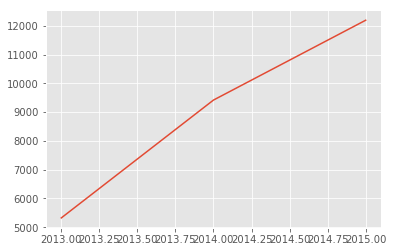

In [29]:
#Gráfico de Crescimento da utilização de celular para acessar a internet (Primeira Faixa (<33%))
p33_phone_grow = [5323,9420,12195]

anos = [2013,2014,2015]

plt.plot(anos,p33_phone_grow)
plt.show()


In [30]:
#Contagem de pessoas que utilizam o Celular no PNAD2013
p33_66z[(p33_66z.V02324 == "Sim")].count()

V0220     8180
V0231     8180
V02322    8180
V02323    8180
V02324    8180
V02325    8180
V4614     8180
dtype: int64

In [31]:
#Contagem de pessoas que utilizam o Celular no PNAD2014 (Crescimento de 94%)
p33_66y[(p33_66y.V02324 == "Sim")].count()

V0220     15871
V0231     15871
V02322    15871
V02323    15871
V02324    15871
V02325    15871
V4614     15871
dtype: int64

In [32]:
#Contagem de pessoas que utilizam o Celular no PNAD2015 (Crescimento de 21%)
p33_66x[(p33_66x.V02324 == "Sim")].count()
#######No total, houve um aumento entre 2013 e 2015 de 135% na utilização de Celulares 



V0220     19278
V0231     19278
V02322    19278
V02323    19278
V02324    19278
V02325    19278
V4614     19278
dtype: int64

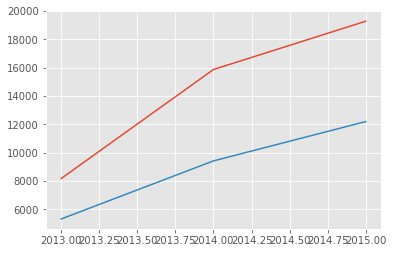

In [33]:
#Gráfico de Crescimento da utilização de celular para acessar a internet (Segunda Faixa(33%_66%) e primeira)
p33_66_phone_grow = [8180,15871,19278]
p33_phone_grow = [5323,9420,12195]



anos = [2013,2014,2015]

plt.plot(anos,p33_66_phone_grow)
plt.plot(anos,p33_phone_grow)


plt.show()



In [34]:
#Contagem de pessoas que utilizam o Celular no PNAD2013
p66_99z[(p66_99z.V02324 == "Sim")].count()

V0220     15229
V0231     15229
V02322    15229
V02323    15229
V02324    15229
V02325    15229
V4614     15229
dtype: int64

In [35]:
#Contagem de pessoas que utilizam o Celular no PNAD2014 (Aumento de 70%)
p66_99y[(p66_99y.V02324 == "Sim")].count()

V0220     25894
V0231     25894
V02322    25894
V02323    25894
V02324    25894
V02325    25894
V4614     25894
dtype: int64

In [36]:
#Contagem de pessoas que utilizam o Celular no PNAD2015 (Aumento de 16%)
p66_99x[(p66_99x.V02324 == "Sim")].count()
#######No total, houve um aumento entre 2013 e 2015 de 97% na utilização de Celulares 

V0220     30153
V0231     30153
V02322    30153
V02323    30153
V02324    30153
V02325    30153
V4614     30153
dtype: int64

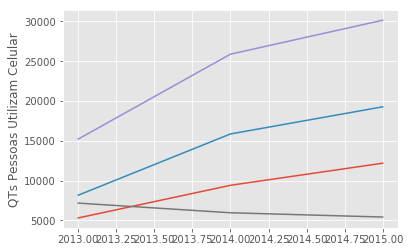

In [37]:
#                                       Neste gráfico, podemos perceber a relação existente entre o crescente uso do 
#                                       celular como meio de acesso a internet nas três faixas de classe e o crescime-
                                #.      nto negativo da utilização de computadores.
p33_phone_grow = [5323,9420,12195]
p33_66_phone_grow = [8180,15871,19278]
p66_99_phone_grow = [15229,25894,30153]
pc_grow_33 = [7183,5971,5433]




anos = [2013,2014,2015]
plt.plot(anos,p33_phone_grow)
plt.plot(anos,p33_66_phone_grow)
plt.plot(anos,p66_99_phone_grow)
plt.plot(anos,pc_grow_33)
plt.ylabel('QTs Pessoas Utilizam Celular')

plt.show()

#Vermelho = Crescimento Smartphone Faixa 1
#Azul     = Crescimento Smartphone Faixa 2
#Roxo     = Crescimento Smartphone Faixa 3
#Cinza    = Crescimento PC Faixa 1


V02324,Sim,Nao
V02323,,
Sim,40226,4519
Nao,21395,192


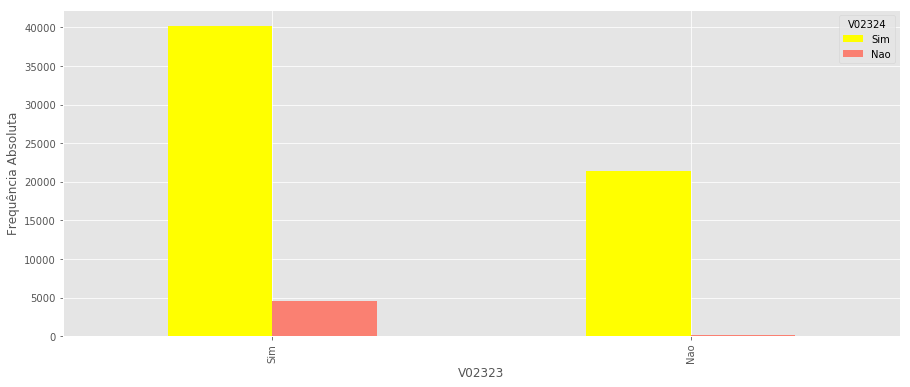

In [38]:
#Utilização de Celular em relação a utilização de Computador
ct1 = pd.crosstab(x.V02323,x.V02324)
ct1.plot(kind='bar', color=('yellow', 'salmon'),figsize=(15,6))
plt.ylabel('Frequência Absoluta')
ct1

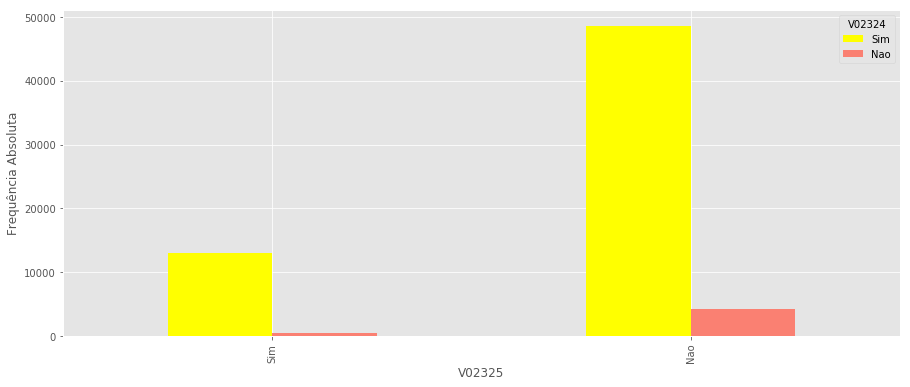

In [39]:
#Utilização de Celular em relação a utilização de Tablet

ct1 = pd.crosstab(x.V02325,x.V02324)
ct1.plot(kind='bar', color=('yellow', 'salmon'),figsize=(15,6))
plt.ylabel('Frequência Absoluta')


___
## Conclusão 

A partir da análise dos gráficos e da contagem de dados das colunas, percebe-se que o principal meio de acessar a internet se tornou o Celular. Isso se deve, segundo Capelas (2016) em matéria do Estadão, a facilidade e o tamanho do dispositivo, tornando o acesso a rede possível em qualquer lugar. 

O computador, que era o meio mais utilizado até poucos anos atrás, sofreu uma forte queda na utilização devido ao crescimento de smartphones de baixo custo. O mercado, por sua vez, impulsionou a produção de celulares com fácil acesso a rede e rapidamente se adaptou às novas tendências mundiais.

Os tablets, apesar de obterem um crescimento na utilização nos ultimos anos, ainda perde para o smartphone pelo seu tamanho, pela impossibilidade de realizar ligações telefônicas, pelo seu preço e pela falta de portabilidade. A tela grande ainda é um chamariz para empresários que buscam fazer apresentações sucintas em reuniões ou para crianças que gostam de jogos.

Percebe-se, portanto, que independente da faixa de renda, o aparelho com maior utilização e maior crescimento, para a utilização de internet, dentro do mercado brasileiro é o Celular. Este se mostrou em crescimento desde 2013, apresentando um aumento de 361% nas três faixas de renda. O Crescimento foi ainda maior na faixa do meio, o que representaria, dentro dos meus parâmetros, a classe média da sociedade, com ganhos per capita estimados em RS 1400 e RS 2900.















http://jornalggn.com.br/blog/uso-de-celular-e-internet-dobra-nas-classes-baixas
http://link.estadao.com.br/noticias/cultura-digital,celular-vira-o-principal-meio-de-acesso-a-internet-no-brasil,10000075832